In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Load the CSV file
df = pd.read_csv('/content/archive (1).zip' )
print("# Data Loaded Successfully!\n")

# Data Loaded Successfully!



In [ ]:
print(" Preview of Dataset:")
print(df.head(11))

 Preview of Dataset:
                crash_date traffic_control_device weather_condition  \
0   07/29/2023 01:00:00 PM         TRAFFIC SIGNAL             CLEAR   
1   08/13/2023 12:11:00 AM         TRAFFIC SIGNAL             CLEAR   
2   12/09/2021 10:30:00 AM         TRAFFIC SIGNAL             CLEAR   
3   08/09/2023 07:55:00 PM         TRAFFIC SIGNAL             CLEAR   
4   08/19/2023 02:55:00 PM         TRAFFIC SIGNAL             CLEAR   
5   09/06/2023 12:59:00 AM            NO CONTROLS              RAIN   
6   12/20/2022 11:45:00 AM         TRAFFIC SIGNAL             CLEAR   
7   09/20/2023 02:38:00 PM            NO CONTROLS             CLEAR   
8   06/04/2018 06:42:00 PM         TRAFFIC SIGNAL             CLEAR   
9   09/07/2023 05:30:00 PM      STOP SIGN/FLASHER             CLEAR   
10  09/07/2023 08:32:00 PM         TRAFFIC SIGNAL             CLEAR   

        lighting_condition first_crash_type                  trafficway_type  \
0                 DAYLIGHT          TURNING   

In [ ]:
print("Available columns:", df.columns.tolist())


Available columns: ['crash_date', 'traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type', 'intersection_related_i', 'damage', 'prim_contributory_cause', 'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour', 'crash_day_of_week', 'crash_month']


In [ ]:
df['crash_hour'] = pd.to_datetime(df['crash_hour'], errors='coerce').dt.hour


In [ ]:
df['Time'] = pd.to_datetime(df['crash_hour'], errors='coerce').dt.hour


✅ Found CSV file: traffic_accidents.csv
📋 Columns: ['crash_date', 'traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type', 'intersection_related_i', 'damage', 'prim_contributory_cause', 'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour', 'crash_day_of_week', 'crash_month']


/tmp/ipython-input-27-1591598099.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='crash_hour', data=df, palette='coolwarm')
/tmp/ipython-input-27-1591598099.py:31: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


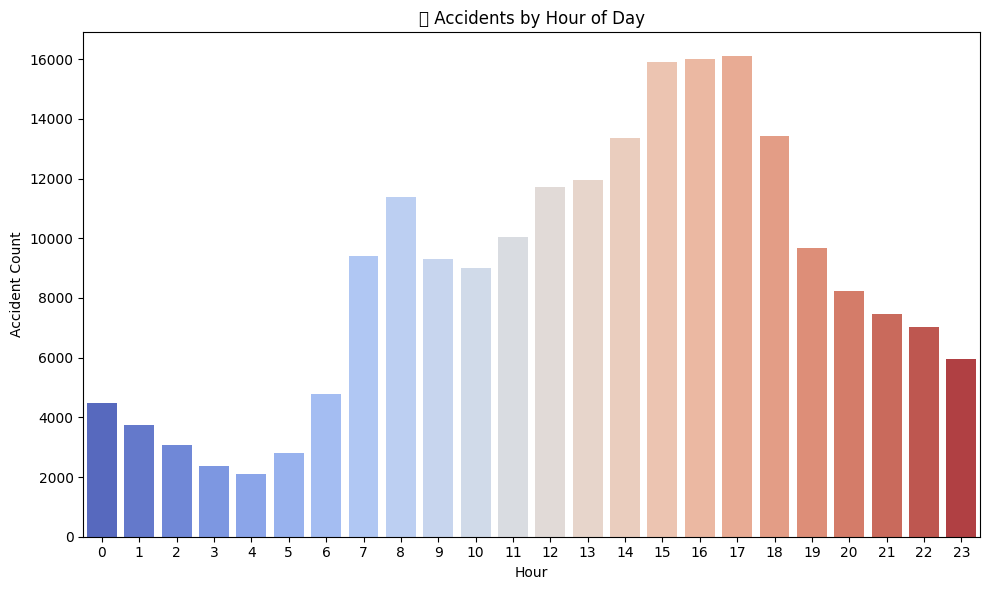

/tmp/ipython-input-27-1591598099.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='crash_day_of_week', data=df, order=day_order, palette='pastel')
/tmp/ipython-input-27-1591598099.py:41: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


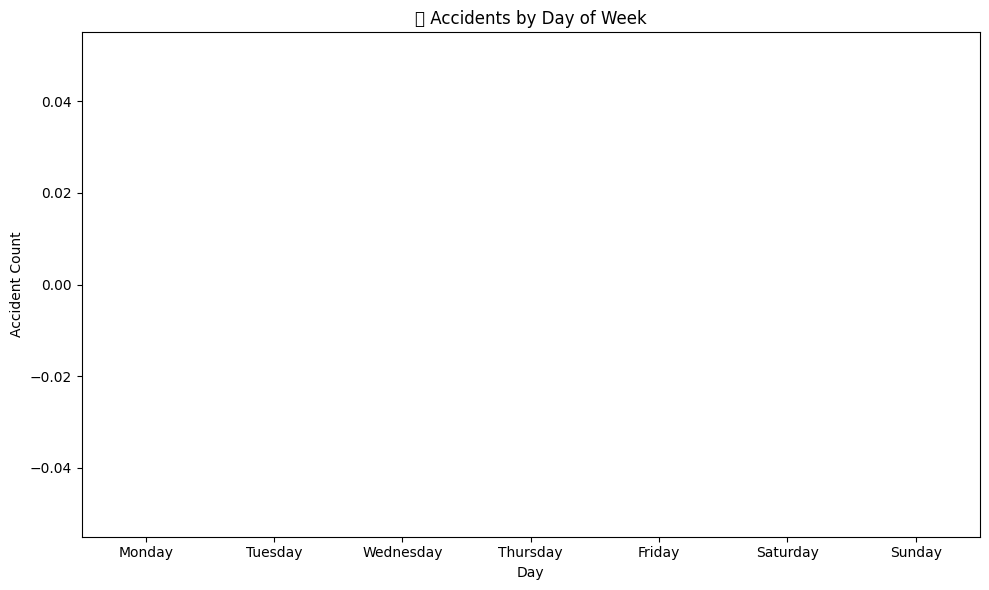

/tmp/ipython-input-27-1591598099.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='most_severe_injury', data=df, order=df['most_severe_injury'].value_counts().index, palette='Set2')


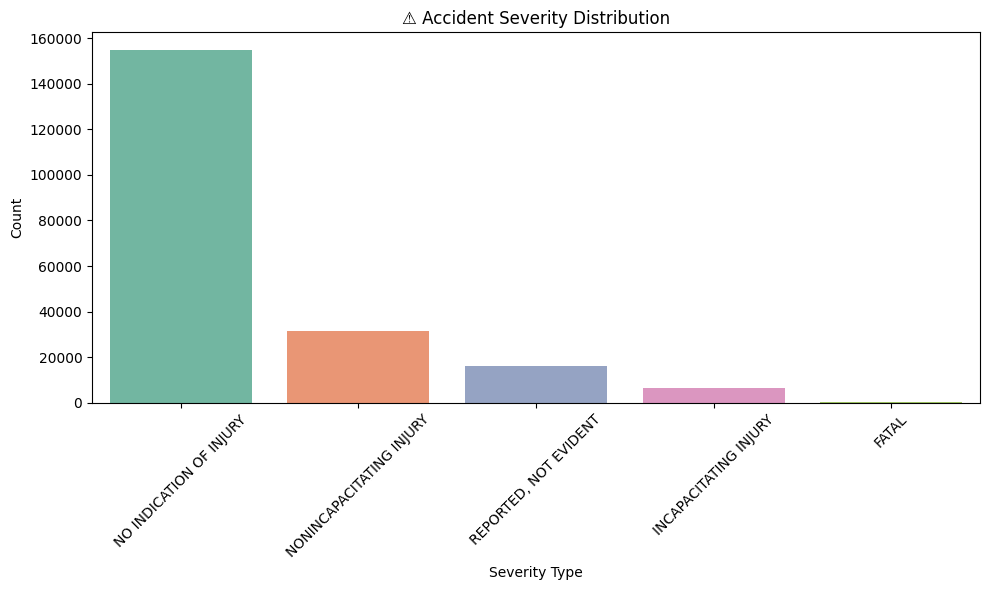

/tmp/ipython-input-27-1591598099.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather_condition', data=df[df['weather_condition'].isin(top_weather)],


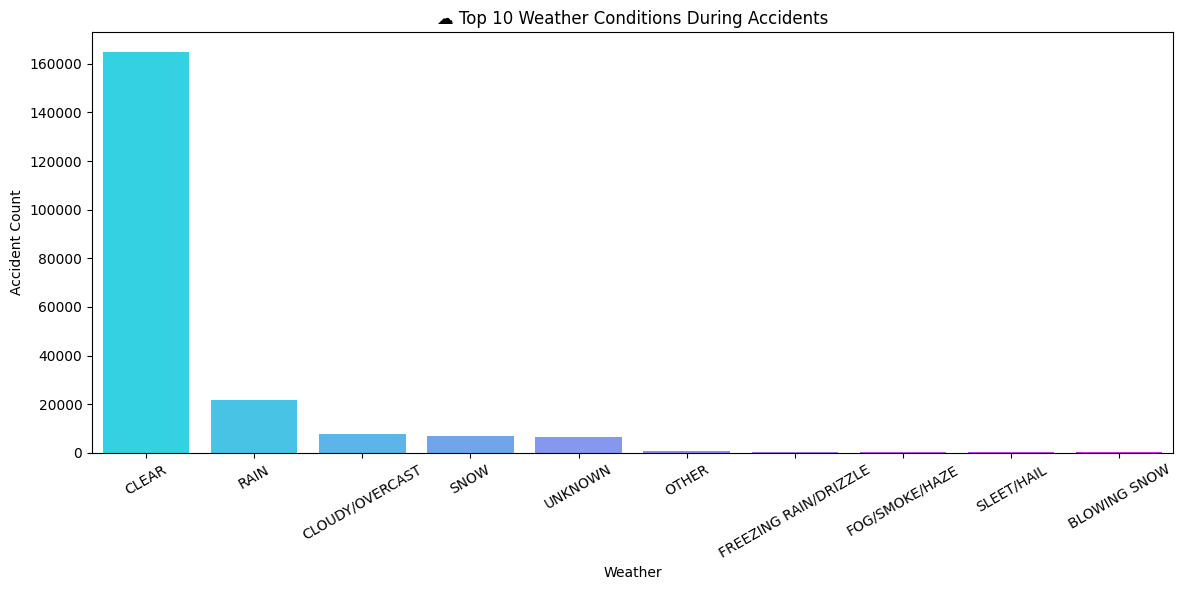

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

zip_path = "/content/archive (1).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    csv_file = [f for f in zip_ref.namelist() if f.endswith('.csv')][0]
    print("✅ Found CSV file:", csv_file)
    with zip_ref.open(csv_file) as f:
        df = pd.read_csv(f)

print("📋 Columns:", df.columns.tolist())
df = df.dropna(subset=['crash_hour', 'crash_day_of_week', 'most_severe_injury'])

df['most_severe_injury'] = df['most_severe_injury'].astype(str).str.strip()
df['crash_day_of_week'] = df['crash_day_of_week'].astype(str).str.strip()

plt.figure(figsize=(10, 6))
sns.countplot(x='crash_hour', data=df, palette='coolwarm')
plt.title("🕒 Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='crash_day_of_week', data=df, order=day_order, palette='pastel')
plt.title("📅 Accidents by Day of Week")
plt.xlabel("Day")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='most_severe_injury', data=df, order=df['most_severe_injury'].value_counts().index, palette='Set2')
plt.title("⚠️ Accident Severity Distribution")
plt.xlabel("Severity Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

if 'weather_condition' in df.columns:
    plt.figure(figsize=(12, 6))
    top_weather = df['weather_condition'].value_counts().head(10).index
    sns.countplot(x='weather_condition', data=df[df['weather_condition'].isin(top_weather)],
                  order=top_weather, palette='cool')
    plt.title("☁️ Top 10 Weather Conditions During Accidents")
    plt.xlabel("Weather")
    plt.ylabel("Accident Count")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
